# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import duckdb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Load the Dataset

In [3]:
df=pd.read_csv("supply_chain_data.csv")
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


# 3. Data Overview

In [4]:
df.shape

(100, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [7]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

# 4. EXPLORATORY DATA ANALYSIS (EDA)

### 4.1 Business Questions

### Q1: Which product type generates highest revenue?

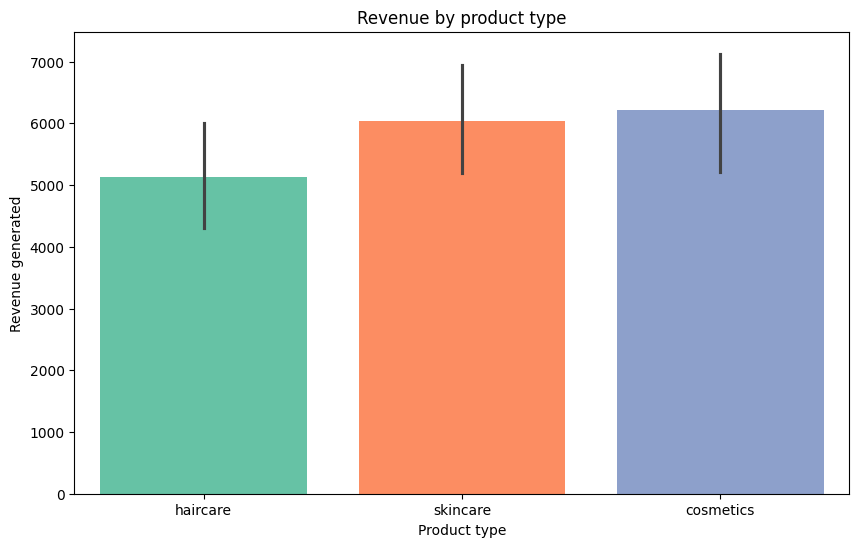

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product type',y='Revenue generated',
            data=df,palette='Set2',hue='Product type',saturation=1)
plt.title("Revenue by product type")
plt.show()

### Q2: Which supplier has highest manufacturing cost?

C:\Users\mbima\AppData\Local\Temp\ipykernel_17908\2811684730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Supplier name", y="Manufacturing costs", data=df,palette='deep')


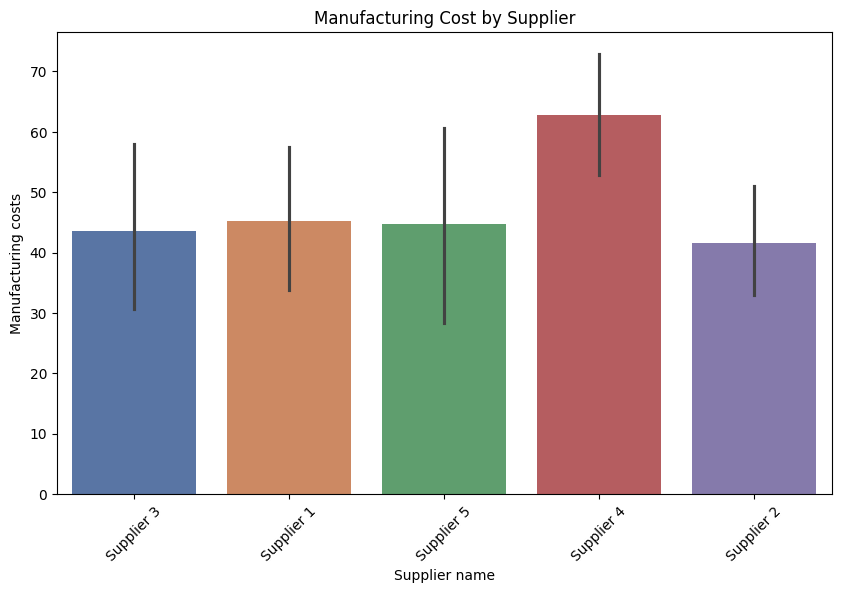

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x="Supplier name", y="Manufacturing costs", data=df,palette='deep')
plt.xticks(rotation=45)
plt.title("Manufacturing Cost by Supplier")
plt.show()


### Q3: Shipping cost distribution by shipping carrier

C:\Users\mbima\AppData\Local\Temp\ipykernel_17908\3335154820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Shipping carriers", y="Shipping costs", data=df,palette='Set2')


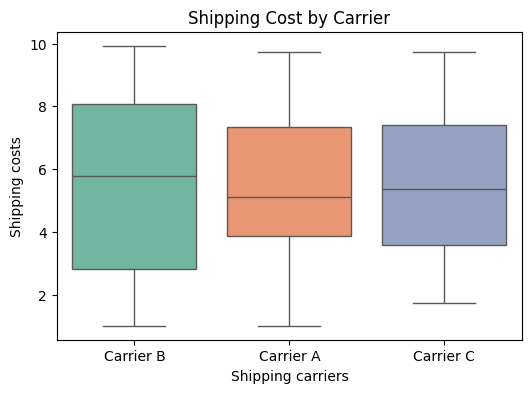

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Shipping carriers", y="Shipping costs", data=df,palette='Set2')
plt.title("Shipping Cost by Carrier")
plt.show()


### Q4: Relationship between stock level & sales

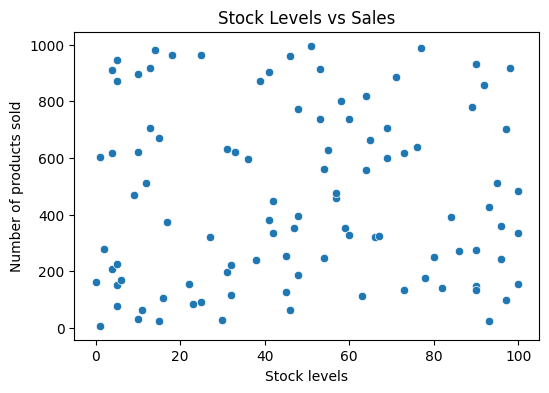

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Stock levels", y="Number of products sold", data=df)
plt.title("Stock Levels vs Sales")
plt.show()


### Q5: Average lead time by product type

C:\Users\mbima\AppData\Local\Temp\ipykernel_17908\373853100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product type", y="Lead times", data=df,palette='deep')


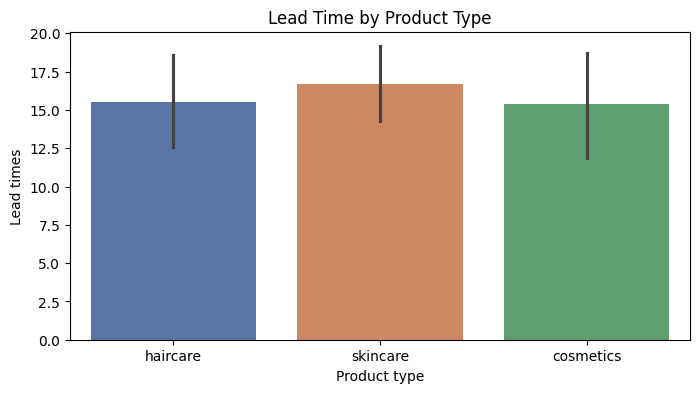

In [13]:
plt.figure(figsize=(8,4))
sns.barplot(x="Product type", y="Lead times", data=df,palette='deep')
plt.title("Lead Time by Product Type")
plt.show()


# 5. SQL ANALYSIS (DuckDB)

#### Total Revenue

In [15]:
query1="""
SELECT ROUND(SUM("Revenue generated"),2) as total_revenue
FROM df
"""

duckdb.query(query1).df()

,total_revenue
0,577604.82


#### Revenue by product type

In [16]:
query2="""
SELECT "Product type",
ROUND(SUM("Revenue generated"),2) as total_revenue
FROM df group by 1
ORDER BY 2
"""

duckdb.query(query2).df()


,Product type,total_revenue
0,cosmetics,161521.27
1,haircare,174455.39
2,skincare,241628.16


#### Average shipping cost by carrier

In [17]:
query3="""
SELECT "Shipping carriers",
ROUND(AVG("Shipping costs"),2) as avg_shipping_cost
FROM df GROUP BY 1
"""

duckdb.query(query3).df()

,Shipping carriers,avg_shipping_cost
0,Carrier C,5.60
1,Carrier A,5.55
2,Carrier B,5.51


#### Top Selling products

In [18]:
query4="""
SELECT "Product type",SUM("Number of products sold") as total_sale
FROM df
GROUP BY 1
ORDER BY 2 DESC
"""

duckdb.query(query4).df()

,Product type,total_sale
0,skincare,20731.0
1,haircare,13611.0
2,cosmetics,11757.0


#### Revenue Contribution by Location

In [19]:
query5="""
SELECT "Location",ROUND(SUM("Revenue generated"),2) as total_revenue
FROM df
GROUP BY 1
ORDER BY 2 DESC

"""

duckdb.query(query5).df()

,Location,total_revenue
0,Mumbai,137755.03
1,Kolkata,137077.55
2,Chennai,119142.82
3,Bangalore,102601.72
4,Delhi,81027.70


# 6. Feature Engineering

In [20]:
# One -hot encoding
df_encoded=pd.get_dummies(df,drop_first=True)

X=df_encoded.drop("Number of products sold",axis=1)
y=df_encoded["Number of products sold"]



# 7. Train-Test Split & Scaling

In [21]:
X_train,X_test,y_train,y_test= train_test_split(
    X,y,test_size=0.2,random_state=42
)

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Baseline Model

In [55]:
import numpy as np
from sklearn.metrics import mean_absolute_error

baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mae = mean_absolute_error(y_test, baseline_pred)

print("Baseline MAE:", baseline_mae)


Baseline MAE: 277.45


# 8. MACHINE LEARNING MODEL (Neural Network)

In [44]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

C:\Users\mbima\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 9. Model Training

In [45]:
history = model.fit(
    X_train,
    y_train,
    epochs=40,
    validation_split=0.2,
    verbose=1
)

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 439ms/step - loss: 295806.3750 - val_loss: 287599.0000
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 295470.8125 - val_loss: 287398.5938
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 295154.5625 - val_loss: 287195.2188
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 294796.0625 - val_loss: 286986.3125
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 294437.5000 - val_loss: 286764.8125
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 294073.9375 - val_loss: 286533.6562
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - loss: 293681.8125 - val_loss: 286292.8125
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 293260.7500 - val_loss: 286043.6875
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 292846.1875 - val_loss: 285789.4375
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - loss: 292412.5000 - val_loss: 285528.0000
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 

### Loss curve

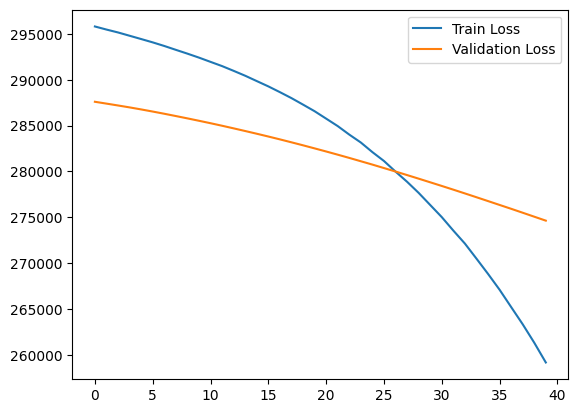

In [46]:


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# 9. Model Evaluation

In [47]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Mean Squared Error: 310653.78125


In [48]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
print("MAE:", mae)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
MAE: 464.3856506347656


### Actual vs Predicted

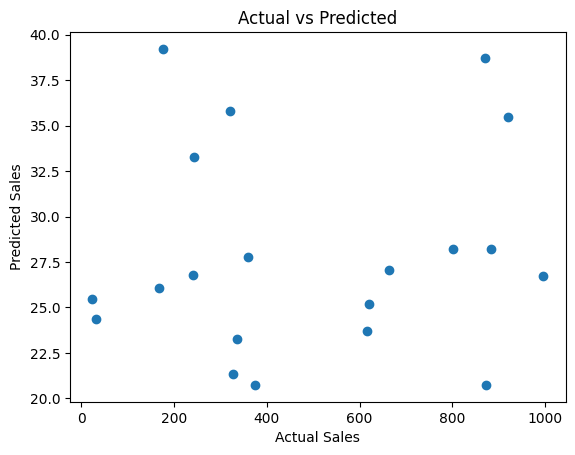

In [49]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted")
plt.show()

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_preds)

print("Random Forest MAE:", rf_mae)


Random Forest MAE: 358.19425000000007


# 11. Save & Load Model

In [50]:
model.save("demand_forecasting_model.keras")



In [51]:
from tensorflow.keras.models import load_model

loaded_model = load_model("demand_forecasting_model.keras")



In [52]:
loaded_model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 64)                  │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,453 (126.77 KB)

 Trainable params: 10,817 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,636 (84.52 KB)

In [53]:
loaded_model.get_config()


{'name': 'sequential_8',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 135),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_layer_8',
    'optional': False},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_25',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
 

In [54]:
sample_input = X_test[:1]   # already scaled
prediction = loaded_model.predict(sample_input)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
[[27.044485]]


In [57]:
y_test.describe()

count     20.000000
mean     492.150000
std      316.945168
min       24.000000
25%      241.750000
50%      367.000000
75%      819.250000
max      996.000000
Name: Number of products sold, dtype: float64